In [44]:
library("jmuOutlier");

In [45]:
x <- c(6, 2, 7, 4, 6, 3, 4, 4, 7, 8, 8, 2, 2, 4, 6, 5, 10,2, 7, 8, 4, 5, 4, 3, 5,
       6, 5, 5, 7, 6, 6, 7, 4, 7, 5, 3, 3, 1, 3, 6, 5, 3, 2, 6, 6, 11, 5, 3, 6, 5);
x <- sort(x); # Упорядоченная выборка (вар. ряд)
n <- length(x);

a <- 4.11;
b <- 5.89;

al <- 0.2;
lbd_0 <- 5.00;
lbd_1 <- 7.00

In [46]:
cat(x)

1 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 8 8 8 10 11

Вариационный ряд: 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 10, 11

In [47]:
f_emp <- function(x, t){ # Эмпирическая функция распределения
    z <- x[x<t];
    length(z)/length(x)
}

l <- as.integer(min(x) - 1)
u <- as.integer(max(x) + 1)

xu <- unique(x);
yu <- 0;
for(i in 1:length(xu)){
    yu[i] = f_emp(x, xu[i]);
}
yu[length(xu) + 1] = 1;
f_emp_graph = stepfun(xu, yu);

freqs <- 0;
for(i in 1:length(xu)){
    freqs[i] <- yu[i+1] - yu[i];
}

Гистограмма частот:

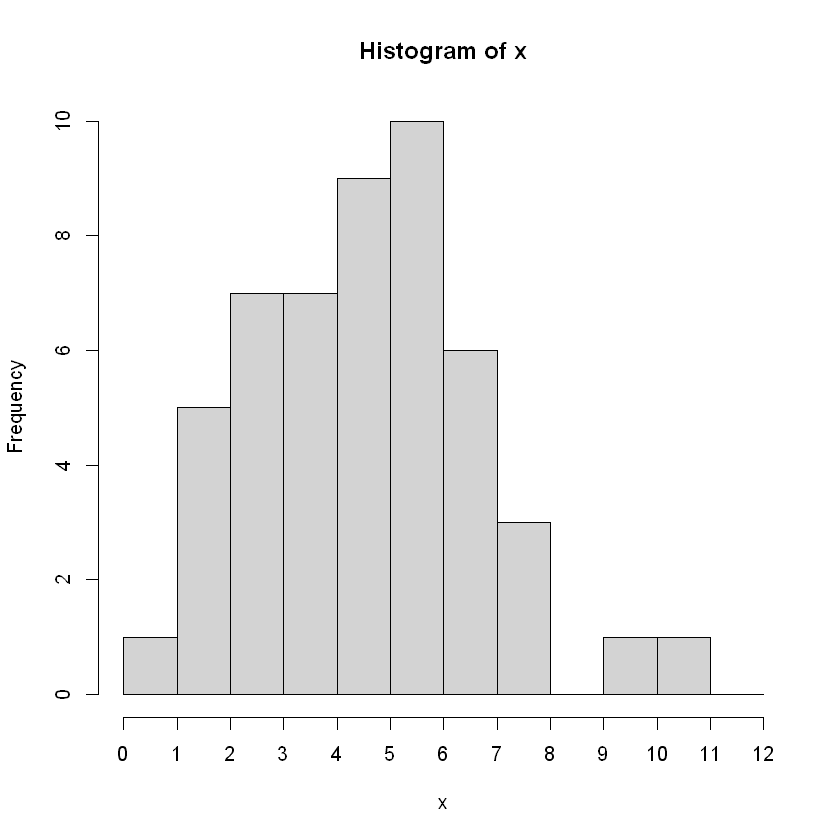

In [48]:
# Гистограмма частот
hist(x,freq=TRUE, breaks=c(l:u));
axis(1, at = c(l:u));

Эмпирическая функция распределения: $\Large F_{эмп}(x) = \frac{\sum\limits_{i=1}^n \mathbb{1}\{x_i < x\}}{n}$

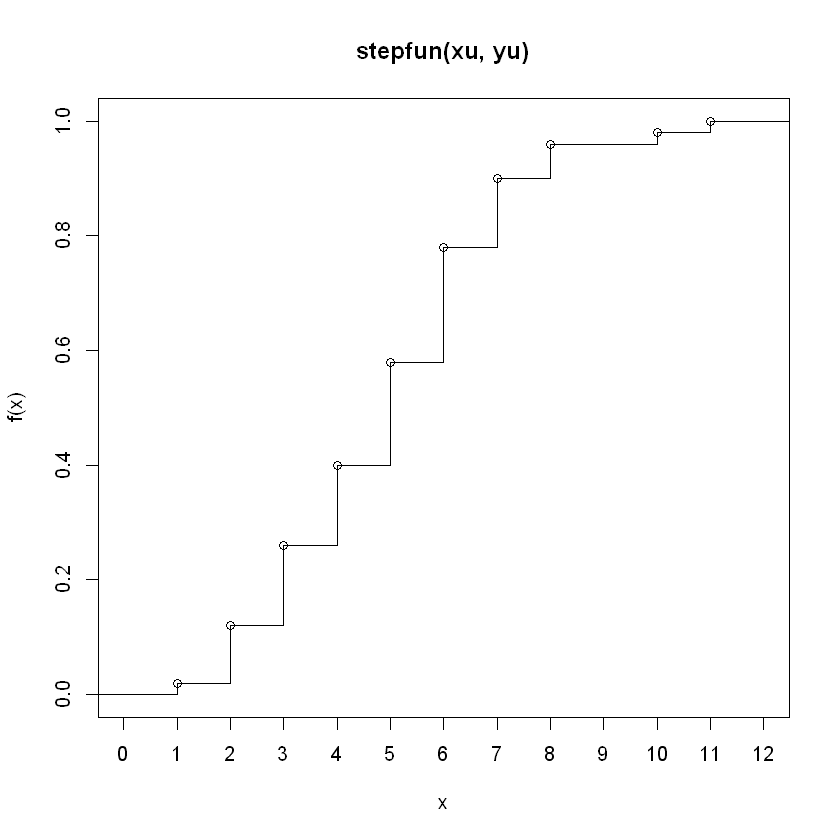

In [49]:
# График эмп. функции распределения
plot(f_emp_graph);
axis(1, at = c(l:u));

Выборочное среднее: $\Large\overline x = \frac{\sum\limits_{i=1}^n x_i}{n}$\
Выборочная дисперсия: $\Large\frac{\sum\limits_{i=1}^n x_i^2}{n} - \overline x$\
Медиана: $\Large x_{\normalsize n/2+1}$\

Асимметрия: $\Large\frac{\sum\limits_{i=1}^n (x_i - \overline x)^3}{n\sigma^{3/2}}$\
Эксцесс: $\Large\frac{\sum\limits_{i=1}^n (x_i - \overline x)^4}{n\sigma^2 - 3}$\
Вероятность $P(x \in [a, b]) = F_{эмп}(b) - F_{эмп}(a)$

In [50]:
mean <- sum(x)/length(x); # Выборочное среднее

var <- sum(x^2)/length(x) - mean^2; # Выборочная дисперсия

median <- x[length(x) %/% 2 + 1]; # Медиана

asm <- sum((x-mean)^3)/length(x)/var^(3/2); # Выборочная асимметрия

exc <- sum((x-mean)^4)/length(x)/var^2-3 # Выборочный эксцесс

P_a_b <- f_emp(x, b) - f_emp(x, a); # Вер-ть P(a <= x <= b)

cat("Среднее: ", mean[1], "\n")
cat("Выб. дисперсия: ", var[1], "\n")
cat("Медиана: ", median[1], "\n")
cat("Асимметрия: ", asm[1], "\n")
cat("Эксцесс: ", exc[1], "\n")
cat("P(", a, "<= x <=", b, "): ", P_a_b[1], "\n")

Среднее:  5.04 
Выб. дисперсия:  4.3584 
Медиана:  5 
Асимметрия:  0.4216897 
Эксцесс:  0.1767403 
P( 4.11 <= x <= 5.89 ):  0.18 


Найдём оценку параметра $\lambda$ по методу МП:

$\large p(x) = \Large \frac{e^{-\lambda}\lambda^x}{x!}$\
\
$\large L(x, \lambda) = \Large \prod\limits_{i=1}^n \frac{e^{-\lambda}\lambda^{x_i}}{x_i!} = e^{-\lambda n} * \lambda^{\normalsize\sum\limits_{i=1}^n x_i} * \prod\limits_{i=1}^n \frac{1}{x_i!}$

Логарифмируем:

$\large LL(x, \lambda) = -\lambda n + log{\lambda \sum\limits_{i=1}^n x_i} + log{\prod\limits_{i=1}^n \frac{1}{x_i!}}$

Дифференцируем по $\lambda$:

$\Large \frac{\partial LL(x, \lambda)}{\partial \lambda} = -n + \frac{\sum\limits_{i=1}^n x_i}{\lambda}$

Максимизация:

$\Large -n + \frac{\sum\limits_{i=1}^n x_i}{\lambda} = 0$

$\Large\hat\lambda = \frac{\sum\limits_{i=1}^n x_i}{n} = \overline x$

Найдём оценку по методу моментов:

$\large \hat\lambda = \overline x$

$\Large E\hat\lambda = \frac{1}{n}\sum\limits_{i=1}^n Ex_i = \frac{1}{n}\lambda n = \lambda$

Оценка является несмещённой.

In [51]:
minus_ll <- function(lbd){
	-sum(log(dpois(x, lbd)));
}
est <- nlm(minus_ll, p=mean);

cat("ОМП для указанного параметра:", est$estimate, "\n");

ОМП для указанного параметра: 5.04 


Построение доверительного интервала для $\lambda$ на основе ОМП

По ЦПТ:
$\Large \frac{{\sum\limits_{i=1}^n x_i} - n\lambda}{\sqrt{n\lambda}}\rightarrow N(0,1)\ при\ n \rightarrow \infty$

Выберем $\Large x_\alpha: \Phi(x_\alpha) = 1 - \frac{\alpha}{2} = 0.9$

$\Large P(-x_\alpha \leq \frac{{\sum\limits_{i=1}^n x_i} - n\lambda}{\sqrt{n\lambda}} \leq x_\alpha) = 1-\alpha$

$\Large P(- \frac{\sqrt{\lambda}x_\alpha}{\sqrt{n}} \leq \overline x - \lambda \leq \frac{\sqrt{\lambda}x_\alpha}{\sqrt{n}}) = 1 - \alpha$

$\Large \lambda^2 -(2\overline x + \frac{x_\alpha^2}{n}\lambda + {\overline x}^2) = 0$

$\Large \lambda = \overline x + \frac{x_\alpha^2}{2n} \pm \sqrt{\frac{x_\alpha^2 \overline x}{n} + (\frac{x_\alpha^2}{2n})^2}$ - границы ДИ для параметра $\large \lambda$.

In [52]:
x_al <- qnorm(1 - al/2); # Квантиль станд.норм.расп.
x_al;

itv <- array(dim=2); # Доверительный интервал
common <- mean + x_al^2/2/n; # Середина ДИ
bord <- sqrt((x_al^2/2/n)^2 + x_al^2*mean/n); # Отступ

itv[1] <- common - bord; itv[2] <- common + bord;

cat("Доверительный интервал: [", itv[1], ",", itv[2], "]\n");

[1] 1.281552

Доверительный интервал: [ 4.649212 , 5.463635 ]


Разобьём выборку на интервалы, в каждом из которых не менее 5 значений, и вычислим значение статистики критерия:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


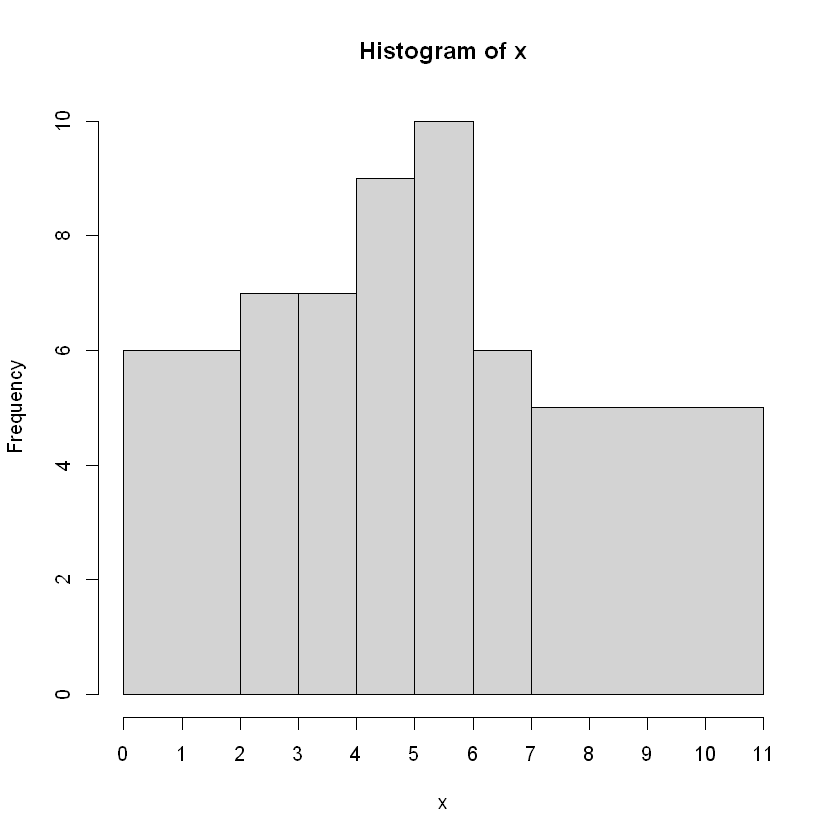

In [53]:
b <- c(2, 3, 4, 5, 6, 7);
r <- length(b) + 1;

h<-hist(x,breaks=c(min(x) - 1,b,max(x)), freq = TRUE);
axis(1, at= min(x): max(x));

$\Large x^2 = \sum\limits_{i=1}^n \frac{(\nu_i - np_{\theta i})^2}{np_{\theta i}}$

Если $\large H_0$ справедлива, $\Large x^2 \sim \chi_{n-1}^2$

Тогда при $\Large x^2 < x_\alpha$ принимается гипотеза $\large H_0$, $\large x_\alpha$ - $(1-\alpha)$-квантиль распределения $\large \chi_{n-1}^2$

$\Large p_{\theta i}(x_i = k) = \frac{\lambda_0^k}{k!}e^{-\lambda_0}$

In [54]:
h<-hist(x,breaks=c(min(x),b,max(x)),plot=FALSE); nu<-h$counts
p<-array(dim=r); p[1]<-ppois(b[1],lbd_0)
p[2:(r-1)]<-ppois(b[2:(r-1)],lbd_0)-ppois(b[1:(r-2)],lbd_0)
p[r]<-1-ppois(b[r-1],lbd_0)
v1<-(nu-n*p); v2<-v1^2/n/p;
x2<-sum(v2); x_al<-qchisq(1-al,r-1);
q <- 1 - pchisq(x2, r-1);

cat("Статистика критерия:", x2, "; Квантиль: ", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Статистика критерия: 1.895273 ; Квантиль:  8.55806 
Максимальный допустимый для H0 уровень значимости: 0.9290738 


1.895273 < 8.55806, принимается гипотеза $\large H_0$

Для проверки сложной гипотезы необходимо минимизировать статистику критерия с помощью подбора параметра $\large \theta = \lambda$. Найденное значение сравнивается с квантилем, и гипотеза $\large H_0$ принимается, если $\large x^2 < x_\alpha$

In [55]:
h <- hist(x,breaks=c(min(x),b,max(x)),plot=FALSE);
nu <- h$counts;
p <- vector(mode="numeric", length=r);

P <- function(a){
	p[1] <- ppois(b[1], a);
	p[2:(r-1)] <- ppois(b[2:(r-1)], a) - ppois(b[1:(r-2)], a);
	p[r] <- 1-ppois(b[r-1], a);
	p;
}

X2 <- function(a){
	g <- n*P(a);
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=mean);

x_al <- qchisq(1-al,r-1);
q <- 1 - pchisq(xm$min, r-1);

cat("Статистика критерия сложной гипотезы:", xm$min, ", параметр:", xm$estimate, "\n");
cat("Квантиль:", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Статистика критерия сложной гипотезы: 1.884737 , параметр: 5.034269 
Квантиль: 8.55806 
Максимальный допустимый для H0 уровень значимости: 0.9299881 


Таким образом, гипотеза согласия с распределением Пуассона $H_0$ принимается.

Плотность геометрического распределения: $\Large p(x) = \frac{\lambda^x}{(\lambda + 1)^{x+1}}$

$\Large L(x, \lambda) = \prod\limits_{i=1}^n \frac{\lambda^{x_i}}{(\lambda + 1)^{x_i+1}} = \frac{\lambda^{\normalsize\sum\limits_{i=1}^n x_i}}{(\lambda + 1)^{{\normalsize\sum\limits_{i=1}^n x_i} + n}}$

$\Large LL(x, \lambda) = {\sum\limits_{i=1}^n x_i} log{\lambda} - {\sum\limits_{i=1}^n x_i} log(\lambda + 1) - n log(\lambda + 1)$

$\Large \frac{\partial LL(x, \lambda)}{\partial \lambda} = \frac{\sum\limits_{i=1}^n x_i}{\lambda} - \frac{\sum\limits_{i=1}^n x_i}{\lambda + 1} - \frac{n}{\lambda + 1}$

$\Large \frac{{\sum\limits_{i=1}^n x_i} - \lambda n}{\lambda(\lambda + 1)} = 0; \sum\limits_{i=1}^n x_i = \lambda n$

$\Large \hat\lambda = \overline x$

Метод моментов:

$\Large Ex_i = \frac{\frac{\lambda}{(\lambda + 1)}}{\frac{1}{\lambda + 1}} = \lambda$

$\Large \hat \lambda = \overline x$

$\Large E\hat\lambda = \frac{1}{n} \sum\limits_{i=1}^{n} Ex_i = \frac{1}{n} \lambda n = \lambda$

Оценка является несмещённой.

In [56]:
minus_ll <- function(lbd){
	-sum(log(lbd^x/(lbd+1)^(x+1)));
}
est <- nlm(minus_ll, p=mean);

cat("ОМП для указанного параметра:", est$estimate, "\n");

ОМП для указанного параметра: 5.04 


По ЦПТ:
$\Large \frac{n \overline x - n \lambda}{\sqrt{n\lambda(\lambda + 1)}} \rightarrow N(0, 1)$

Выберем $\Large x_\alpha: \Phi(x_\alpha) = 1 - \frac{\alpha}{2} = 0.9$

$\Large P(-x_\alpha \leq \frac{\sqrt{n}(\overline x - \lambda)}{\sqrt{\lambda(\lambda + 1)}} \le x_\alpha) = 1 - \alpha$

$\Large P(-\frac{\sqrt{\lambda(\lambda + 1)} x_\alpha}{\sqrt{n}} \leq \overline x - \lambda \leq \frac{\sqrt{\lambda(\lambda + 1)} x_\alpha}{\sqrt{n}}) = 1 - \alpha$

$\Large (1 - \frac{x_\alpha}{n} \lambda^2) - (2 \overline x + \frac{{x_\alpha}^2}{n})\lambda + {\overline x}^2 = 0$

$\Large \lambda = \frac{2\overline x + \frac{{x_\alpha}^2}{n} \pm \frac{x_\alpha}{\sqrt{n}}\sqrt{4 \overline x + \frac{{x_\alpha}^2}{n} + 4 {\overline x}^2}}{2(1 - \frac{{x_\alpha}^2}{n})}$ - границы ДИ для параметра $\lambda$

In [57]:
x_al <- qnorm(1 - al/2); # Квантиль станд.норм.расп.

itv <- array(dim=2); # Доверительный интервал
common <- (2*mean + x_al^2/n)/2/(1-x_al^2/n); # Середина ДИ
bord <- x_al*sqrt(4*mean + x_al^2/n + 4*mean^2)/2/sqrt(n)/(1-x_al^2/n); # Отступ

itv[1] <- common - bord; itv[2] <- common + bord;

cat("Доверительный интервал: [", itv[1], ",", itv[2], "]\n");

Доверительный интервал: [ 4.194089 , 6.262222 ]


Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


Статистика критерия: 51.70995 ; Квантиль:  8.55806 
Максимальный допустимый для H0 уровень значимости: 2.132794e-09 


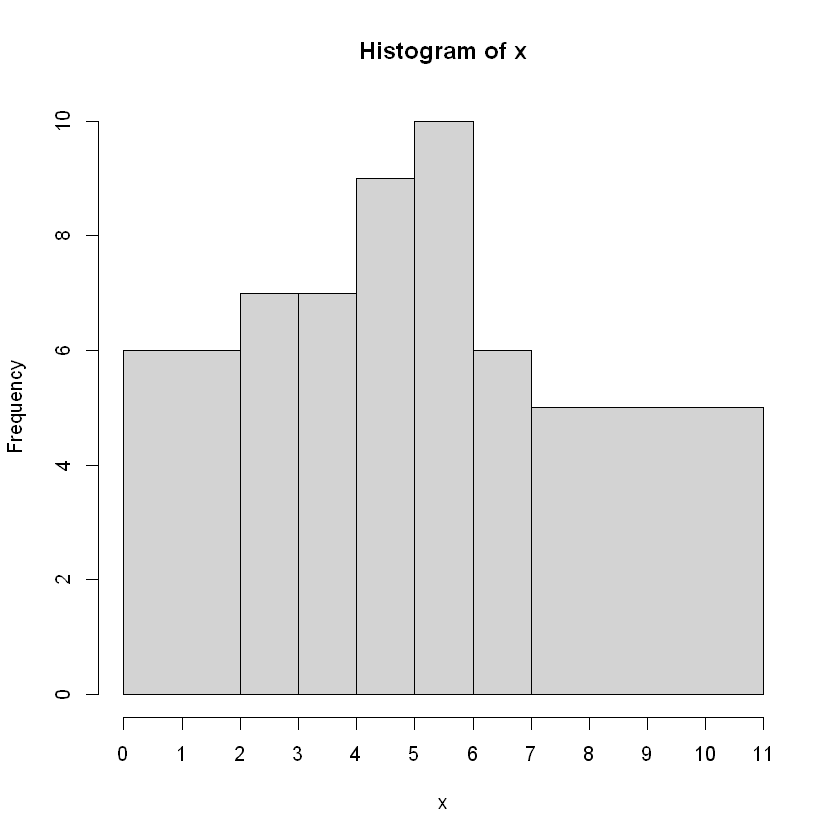

In [58]:
h<-hist(x,breaks=c(min(x) - 1,b,max(x)), freq = TRUE);
axis(1, at= min(x): max(x));
h<-hist(x,breaks=c(min(x),b,max(x)),plot=FALSE); nu<-h$counts
p<-array(dim=r); p[1]<-pgeom(b[1],1/(lbd_0+1));
p[2:(r-1)]<-pgeom(b[2:(r-1)],1/(lbd_0+1))-pgeom(b[1:(r-2)],1/(lbd_0+1))
p[r]<-1-pgeom(b[r-1],1/(lbd_0+1))
v1<-(nu-n*p); v2<-v1^2/n/p;
x2<-sum(v2); x_al<-qchisq(1-al,r-1);
q <- 1 - pchisq(x2, r-1);

cat("Статистика критерия:", x2, "; Квантиль: ", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Гипотеза согласия с геометрическим распределением с параметром $\lambda_0$ отвергается.

In [59]:
h <- hist(x,breaks=c(min(x),b,max(x)),plot=FALSE);
nu <- h$counts;
p <- vector(mode="numeric", length=r);

P <- function(a){
	p[1] <- pgeom(b[1], 1/(a+1));
	p[2:(r-1)] <- pgeom(b[2:(r-1)], 1/(a+1)) - pgeom(b[1:(r-2)], 1/(a+1));
	p[r] <- 1-pgeom(b[r-1], 1/(a+1));
	p;
}

X2 <- function(a){
	g <- n*P(a);
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=mean);

x_al <- qchisq(1-al,r-1);
q <- 1 - pchisq(xm$min, r-1);

cat("Статистика критерия сложной гипотезы:", xm$min, ", параметр:", xm$estimate, "\n");
cat("Квантиль:", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Статистика критерия сложной гипотезы: 51.42297 , параметр: 5.407909 
Квантиль: 8.55806 
Максимальный допустимый для H0 уровень значимости: 2.435673e-09 


Гипотеза согласия с геометрическим распределением отвергается.

In [60]:
x <- c(4.871, 4.978, 4.952, 4.824, 4.944, 5.055, 5.073, 5.042, 5.111, 4.961, 4.740,
       5.184, 4.942, 4.950, 5.103, 4.908, 5.066, 5.014, 4.923, 4.882, 5.015, 4.904,
       5.182, 5.071, 5.096, 5.063, 5.100, 4.956, 5.080, 5.049, 4.910, 4.940, 5.006,
       4.916, 5.128, 5.061, 4.989, 5.152, 5.131, 5.046, 5.110, 5.105, 4.878, 4.955,
       5.245, 5.004, 4.962, 5.142, 5.002, 4.995);
x <- sort(x); # Упорядоченная выборка (вар. ряд)
n <- length(x);

c <- 4.94;
d <- 5.08;

h <- 0.05;

al <- 0.10;

a0 <- 5.00;
a1 <- 4.88;
sig0 <- 0.10;
sig1 <- 0.10;

Вариационный ряд:

In [61]:
cat(x)

4.74 4.824 4.871 4.878 4.882 4.904 4.908 4.91 4.916 4.923 4.94 4.942 4.944 4.95 4.952 4.955 4.956 4.961 4.962 4.978 4.989 4.995 5.002 5.004 5.006 5.014 5.015 5.042 5.046 5.049 5.055 5.061 5.063 5.066 5.071 5.073 5.08 5.096 5.1 5.103 5.105 5.11 5.111 5.128 5.131 5.142 5.152 5.182 5.184 5.245

In [62]:
l <- as.integer(min(x) - 1)
u <- as.integer(max(x) + 1)

xu <- unique(x);
yu <- 0;
for(i in 1:length(xu)){
    yu[i] = f_emp(x, xu[i]);
}
yu[length(xu) + 1] = 1;
f_emp_graph = stepfun(xu, yu);

freqs <- 0;
for(i in 1:length(xu)){
    freqs[i] <- yu[i+1] - yu[i];
}

Гистограмма + полигон частот:

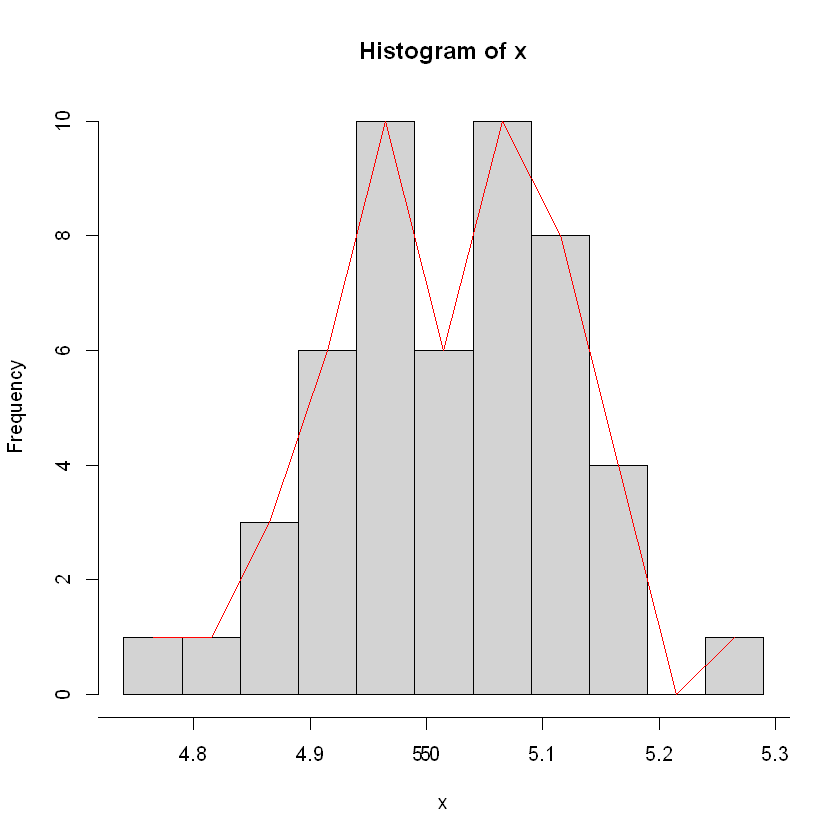

In [63]:
# Гистограмма частот и полигон частот
hist0 <- hist(x, breaks = seq(min(x), 5.29, by=h), freq=TRUE);
lines(hist0$counts ~ hist0$mids, col="red");
axis(1, at = c(l:u));

Эмпирическая функция распределения:

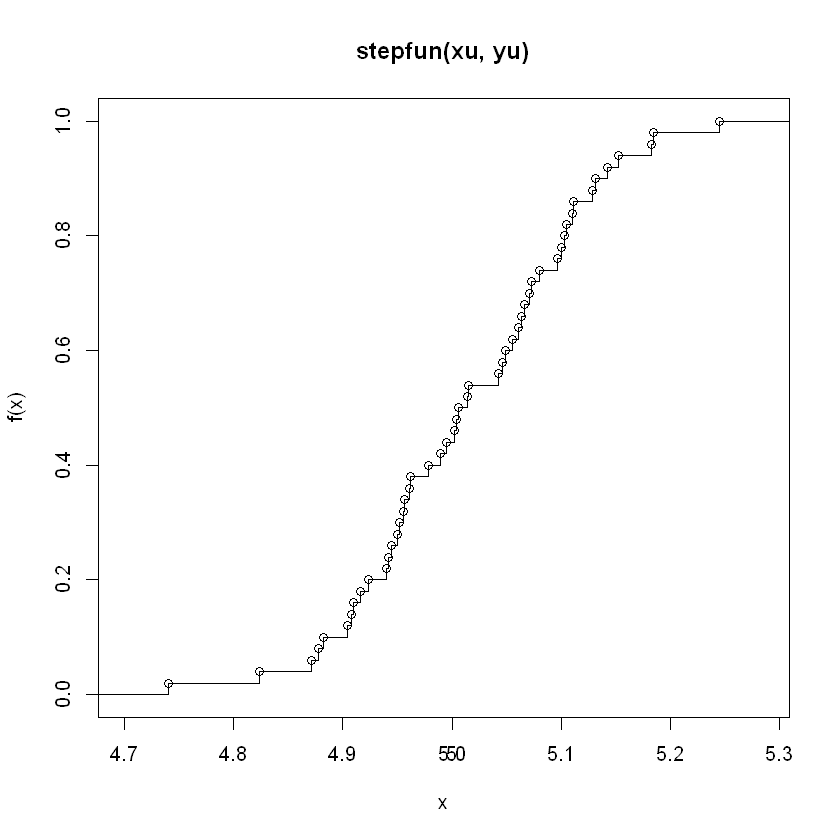

In [64]:
# График эмп. функции распределения
plot(f_emp_graph);
axis(1, at = c(l:u))

Выборочные характеристики:

In [65]:
mean <- sum(x)/length(x); # Выборочное среднее

var <- sum(x^2)/length(x) - mean^2; # Выборочная дисперсия

median <- x[length(x) %/% 2 + 1]; # Медиана

asm <- sum((x-mean)^3)/length(x)/var^(3/2); # Выборочная асимметрия

exc <- sum((x-mean)^4)/length(x)/var^2-3 # Выборочный эксцесс

P_c_d <- f_emp(x, d) - f_emp(x, c); # Вер-ть P(c <= x <= d)

cat("Среднее: ", mean[1], "\n")
cat("Выб. дисперсия: ", var[1], "\n")
cat("Медиана: ", median[1], "\n")
cat("Асимметрия: ", asm[1], "\n")
cat("Эксцесс: ", exc[1], "\n")
cat("P(", c, "<= x <=", d, "): ", P_c_d[1], "\n")

Среднее:  5.01432 
Выб. дисперсия:  0.0100537 
Медиана:  5.014 
Асимметрия:  -0.1575004 
Эксцесс:  -0.1004314 
P( 4.94 <= x <= 5.08 ):  0.52 


Плотность нормального распределения: $\Large p(x, a, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - a)^2}{2\sigma^2}}$

$\Large L(x, a, \sigma) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x_i - a)^2}{2\sigma^2}} = \frac{1}{(2\pi)^{\frac{n}{2}}} \normalsize*\Large \frac{1}{\sigma^n} \normalsize*\Large e^{-\frac{\sum\limits_{i=1}^n (x_i - a)^2}{2\sigma^2}}$

$\Large LL(x, a, \sigma) = -\frac{n}{2}log(2\pi) -nlog\sigma - \frac{\sum\limits_{i=1}^n (x_i - a)^2}{2\sigma^2}$

$\Large \frac{\partial LL(x, a, \sigma)}{\partial a} = \frac{\sum\limits_{i=1}^n x_i - na}{\sigma^2}$

$\Large \frac{\sum\limits_{i=1}^n x_i - na}{\sigma^2} = 0; \sum\limits_{i=1}^n x_i = na$

$\Large \hat a = \overline x$

$\Large \frac{\partial LL(x, a, \sigma)}{\partial \sigma} = -\frac{n}{\sigma} + \frac{\sum\limits_{i=1}^n (x_i - a)^2}{\sigma^3} = \frac{{\sum\limits_{i=1}^n (x_i - a)^2} - n\sigma^2}{\sigma^3}$

$\Large \frac{{\sum\limits_{i=1}^n (x_i - a)^2} - n\sigma^2}{\sigma^3} = 0; \sum\limits_{i=1}^n (x_i - \overline x)^2 = n\sigma^2$

$\Large \hat \sigma^2 = s^2$

Метод моментов:

$\Large \hat a = \overline x$

$\Large \hat \sigma^2 = s^2$


$\Large E\hat a = \frac{1}{n}\sum\limits_{i=1}^n Ex_i = \frac{1}{n}an = a$, оценка $\Large \hat a$ - несмещённая.

$\Large E\hat \sigma^2 = \frac{n-1}{n}\sigma^2$ , смещение оценки: $\Large -\frac{\sigma^2}{n}$

In [66]:
minus_ll_a <- function(a){
    sum((x-a)^2)/2/var^2;
}
a_est <- nlm(minus_ll_a, p=mean);

# НЕ РАБОТАЕТ - КОНФЛИКТ ЛОГАРИФМА И КВАДРАТА
#minus_ll_b <- function(sig){
#     n*log(sig) + sum((x-mean)^2)/2/sig^2;
#}
#b_est <- nlm(minus_ll_b, p=0.0100537);

cat("ОМП для параметра a:", a_est$estimate, "\n");
#cat("ОМП для параметра sig:", b_est$estimate, "\n");

ОМП для параметра a: 5.01432 


По лемме Фишера:
$\sqrt{n-1}\Large\frac{\overline x - n}{s} \sim S_{n-1}$

Выберем $\Large x_\alpha : S_{n-1}(x_\alpha) = 1 - \frac{\alpha}{2} = 0.95$

$\Large P(-x_\alpha \leq \normalsize\sqrt{n-1}\Large\frac{\overline x - n}{s} \leq x_\alpha) = 1-\alpha$

$\Large P(\overline x - \frac{s x_\alpha}{\sqrt{n-1}} \leq a \leq \overline x + \frac{s x_\alpha}{\sqrt{n-1}}) = 1 - \alpha$

Границы ДИ для параметра $\Large a$ : $\Large [\overline x - \frac{s x_\alpha}{\sqrt{n-1}}, \overline x + \frac{s x_\alpha}{\sqrt{n-1}}]$

Снова по лемме Фишера:
$\Large \frac{ns^2}{\sigma^2} \sim \chi_{n-1}^2$

Необходимо выбрать граничные значения $\large x_{\alpha1} : K_{n-1}(x_{\alpha1}) = \frac{\alpha}{2}$ и $\large x_{\alpha2} : K_{n-1}(x_{\alpha2}) = 1 - \frac{\alpha}{2}$

$\Large P(x_{\alpha1} \leq \frac{ns^2}{\sigma^2} \leq x_{\alpha2}) = 1 - \alpha$

$\Large P(\frac{ns^2}{x_{\alpha2}} \leq \sigma^2 \leq \frac{ns^2}{x_{\alpha1}}) = 1 - \alpha$

Границы ДИ для параметра $\Large \sigma^2$ : $\Large [\frac{ns^2}{x_{\alpha2}}, \frac{ns^2}{x_{\alpha1}}]$

In [67]:
x_al <- qt(1 - al/2, n-1);

itv <- array(dim=2); # Доверительный интервал
common <- mean; # Середина ДИ
bord <- x_al*var/sqrt(n-1); # Отступ

itv[1] <- common - bord; itv[2] <- common + bord;
cat("Доверительный интервал для a: [", itv[1], ",", itv[2], "]\n");

x_al_1 <- qchisq(al/2, n-1);
x_al_2 <- qchisq(1 - al/2, n-1);

itv[1] <- n*var/x_al_2; itv[2] <- n*var/x_al_1;

cat("Доверительный интервал для sigma: [", itv[1], ",", itv[2], "]\n");

Доверительный интервал для a: [ 5.011912 , 5.016728 ]
Доверительный интервал для sigma: [ 0.007577557 , 0.01481522 ]


Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


Статистика критерия: 4.367538 ; Квантиль:  10.64464 
Максимальный допустимый для H0 уровень значимости: 0.6270691 


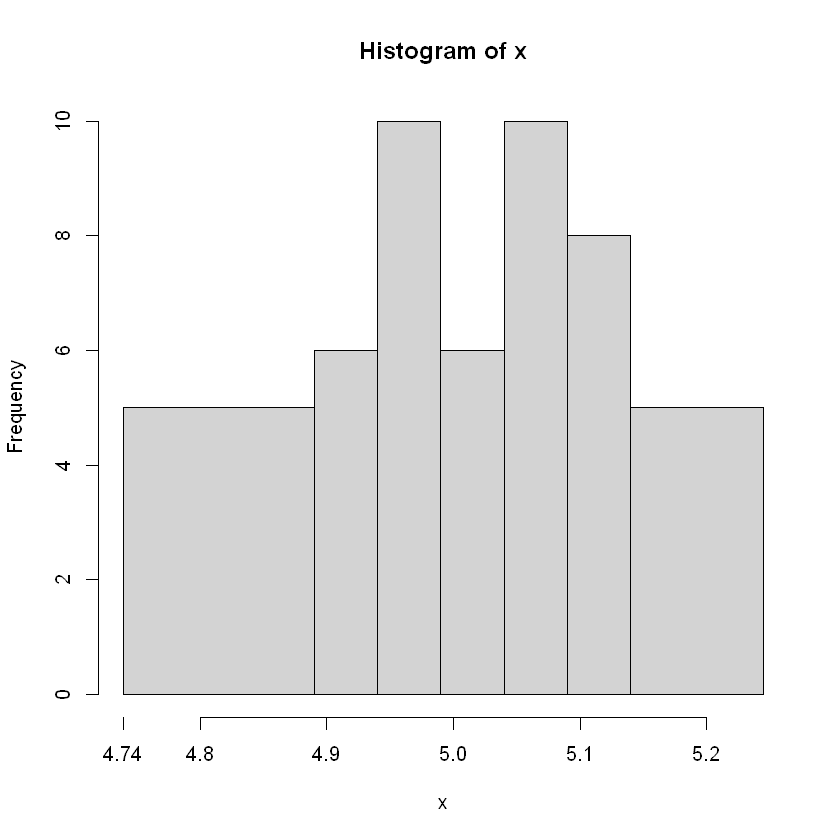

In [68]:
b <- c(4.89, 4.94, 4.99, 5.04, 5.09, 5.14);
r <- length(b) + 1;

his<-hist(x,breaks=c(min(x),b,max(x)), freq = TRUE);
axis(1, at= min(x): max(x));
his<-hist(x,breaks=c(min(x),b,max(x)),plot=FALSE); nu<-his$counts;
p<-array(dim=r); p[1]<-pnorm(b[1], a0, sig0)
p[2:(r-1)]<-pnorm(b[2:(r-1)], a0, sig0)-pnorm(b[1:(r-2)], a0, sig0)
p[r]<-1-pnorm(b[r-1], a0, sig0)
v1<-(nu-n*p); v2<-v1^2/n/p;
x2<-sum(v2); x_al<-qchisq(1 - al, r - 1);
q <- 1 - pchisq(x2, r-1);

cat("Статистика критерия:", x2, "; Квантиль: ", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

In [69]:
his <- hist(x,breaks=c(min(x),b,max(x)),plot=FALSE);
nu <- his$counts;

X2 <- function(par){
	g <-n*(pnorm(c(b, Inf), par[1], par[2]) - pnorm(c(-Inf, b), par[1], par[2]));
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=c(a0, sig0));

x_al <- qchisq(1-al,r-1);
q <- 1 - pchisq(xm$min, r-1);

cat("Статистика критерия сложной гипотезы:", xm$min, ", параметр:", xm$estimate, "\n");
cat("Квантиль:", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Статистика критерия сложной гипотезы: 2.441165 , параметр: 5.019536 0.09966803 
Квантиль: 10.64464 
Максимальный допустимый для H0 уровень значимости: 0.8749932 


Плотность распределения Лапласа: $\Large \frac{1}{\sqrt{2}\sigma}e^{-\frac{\sqrt{2}}{\sigma}|x-a|}$

$\Large L(x, a, \sigma) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2}\sigma}e^{-\frac{\sqrt{2}}{\sigma}|x_i-a|} = \frac{1}{2^{\frac{n}{2}}} \normalsize*\Large \frac{1}{\sigma^n} \normalsize*\Large e^{-\frac{\sqrt(2)}{\sigma} \sum\limits_{i=1}^n |x_i - a|}$

$\Large LL(x, a, \sigma) = -\frac{n}{2}log2 - nlog\sigma - \frac{\sqrt{2}}{\sigma}\sum\limits_{i=1}^n |x_i - a|$

$\Large \frac{\partial LL(x, a, \sigma)}{\partial a} = -\frac{\sqrt{2}}{\sigma}\sum\limits_{i=1}^n sign(x_i - a)$

Минимизируем сумму знаков, взяв медиану в качестве $a$: $\Large \hat a = x_{(\frac{n}{2} + 1)} = 5.014$

$\Large \frac{\partial LL(x, a, \sigma)}{\partial \sigma} = \frac{\sqrt{2}\sum\limits_{i=1}^n |x_i - a| - \sigma n}{\sigma^2}$

$\Large \frac{\sqrt{2}\sum\limits_{i=1}^n |x_i - a| - \sigma n}{\sigma^2} = 0; \sqrt{2}\sum\limits_{i=1}^n |x_i - a| = \sigma n$

$\Large \hat\sigma^2 = \frac{2}{n^2}(\sum\limits_{i=1}^n |x_i - x_{(\frac{n}{2} + 1)}|)^2$

Метод моментов:

$\Large \hat a = \overline x$, оценка $\Large\hat a$ - несмещённая.

$\Large \hat \sigma^2 = s^2$, оценка $\Large\hat \sigma^2$ имеет смещение $\Large -\frac{\sigma^2}{n}$.

In [70]:
minus_ll_a <- function(a){
    sqrt(2)*sum(abs(x-a))/var;
}
a_est <- nlm(minus_ll_a, p=mean);

cat("ОМП для параметра a:", a_est$estimate, "\n");
cat("Либо одно из двух чисел:", x[n/2], x[n/2+1], "\n");
cat("ОМП для параметра sigma:", sqrt(2)*sum(abs(x-mean))/n, "\n");

ОМП для параметра a: 5.010214 
Либо одно из двух чисел: 5.006 5.014 
ОМП для параметра sigma: 0.1168887 


Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"the AREAS in the plot are wrong -- rather use 'freq = FALSE'"


Статистика критерия: 12.18449 ; Квантиль:  10.64464 
Максимальный допустимый для H0 уровень значимости: 0.05797744 


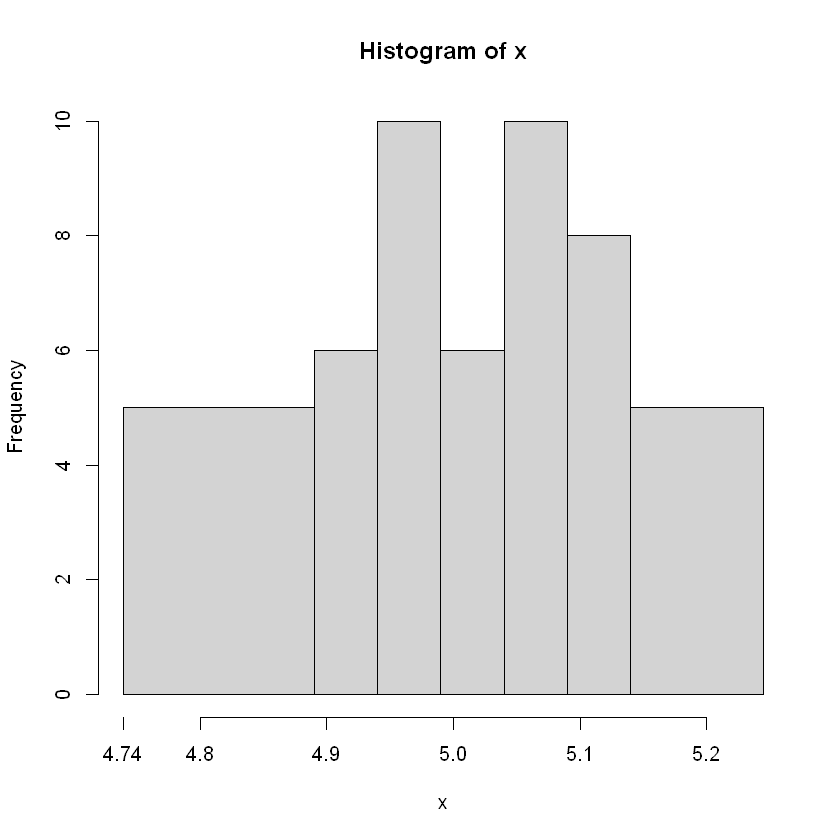

In [71]:
b <- c(4.89, 4.94, 4.99, 5.04, 5.09, 5.14);
r <- length(b) + 1;

his<-hist(x,breaks=c(min(x),b,max(x)), freq = TRUE);
axis(1, at= min(x): max(x));
his<-hist(x,breaks=c(min(x),b,max(x)),plot=FALSE); nu<-his$counts;
p<-array(dim=r); p[1]<-plaplace(b[1], a0, sig0);
p[2:(r-1)]<-plaplace(b[2:(r-1)], a0, sig0)-plaplace(b[1:(r-2)], a0, sig0);
p[r]<-1-plaplace(b[r-1], a0, sig0);
v1<-(nu-n*p); v2<-v1^2/n/p;
x2<-sum(v2); x_al<-qchisq(1 - al, r - 1);
q <- 1 - pchisq(x2, r-1);

cat("Статистика критерия:", x2, "; Квантиль: ", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

In [72]:
his <- hist(x,breaks=c(min(x),b,max(x)),plot=FALSE);
nu <- his$counts;

X2 <- function(par){
	g <-n*(plaplace(c(b, Inf), par[1], par[2]) - plaplace(c(-Inf, b), par[1], par[2]));
	f <- (nu - g)^2/g;
	sum(f);
}

xm <- nlm(X2, p=c(a0, sig0));

x_al <- qchisq(1-al,r-1);
q <- 1 - pchisq(xm$min, r-1);

cat("Статистика критерия сложной гипотезы:", xm$min, ", параметр:", xm$estimate, "\n");
cat("Квантиль:", x_al, "\n");
cat("Максимальный допустимый для H0 уровень значимости:", q, "\n");

Статистика критерия сложной гипотезы: 7.060037 , параметр: 5.023431 0.1248554 
Квантиль: 10.64464 
Максимальный допустимый для H0 уровень значимости: 0.3153307 
